In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import os

import shutil
from sklearn.model_selection import train_test_split


print(torch.__version__)
print(torchvision.__version__)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.4.0+cu121
0.19.0+cu121


In [2]:
data_dir = 'data'
train_dir = 'train_data'
test_dir = 'test_data'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each class
for class_name in os.listdir(data_dir):
    print(class_name)
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    
    # Split the data
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Create class directories in train and test directories
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
    
    # Move the images to the respective folders
    for image in train_images:
        shutil.move(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))
        
    for image in test_images:
        shutil.move(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

In [3]:
train_transform = transforms.Compose([
    transforms.Resize((32, 32)),               # Resize images to 32x32
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
    transforms.RandomHorizontalFlip(),         # Randomly flip images horizontally
    transforms.ToTensor(),                     # Convert images to PyTorch tensors (C, H, W)
    transforms.Normalize([0.5], [0.5])         # Normalize grayscale images with mean=0.5, std=0.5
])

In [4]:
test_transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize([0.5],[0.5])
])

In [5]:
train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=test_transform)

In [6]:
len(train_data), len(test_data)

(60000, 15000)

In [7]:
class_names =train_data.classes
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}

In [9]:
train_data.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
image,label=train_data[0]
image,label

(tensor([[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9922, -0.9843, -0.9843],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -0.9922,  ..., -1.0000, -1.0000, -1.0000]]]),
 0)

In [11]:
image.shape,label

(torch.Size([1, 32, 32]), 0)

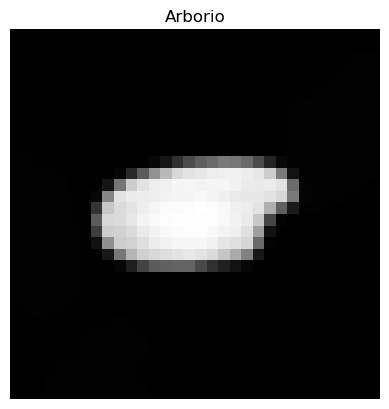

In [12]:
image,label=train_data[0]
image = image.permute(1, 2, 0)
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis("off")
plt.show()

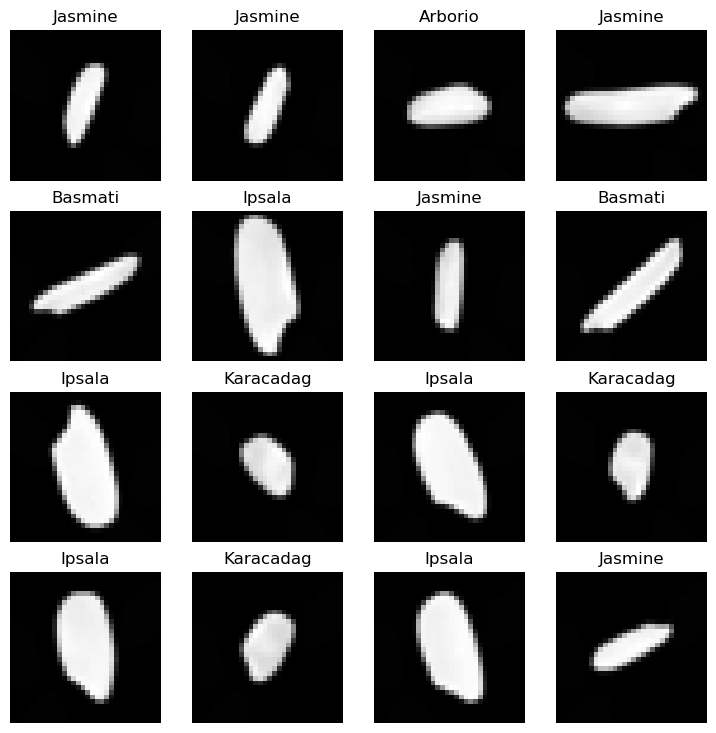

In [13]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
    random_idx=torch.randint(0,len(train_data),size=[1]).item()
    img,label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    img=img.permute(1,2,0)
    plt.imshow(img,cmap='gray')
    plt.title(class_names[label])
    plt.axis("off")
plt.show()

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader=DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x746430d77c70>,
 <torch.utils.data.dataloader.DataLoader at 0x746430d77cd0>)

In [15]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 32, 32]), torch.Size([32]))

In [16]:
flatten_model=nn.Flatten()
flatten_model

Flatten(start_dim=1, end_dim=-1)

In [17]:
x=train_features_batch[0]
print(f"Shape before flattening:{x.shape}")
x=flatten_model(x)
print(f"Shape after flattening:{x.shape}")

Shape before flattening:torch.Size([1, 32, 32])
Shape after flattening:torch.Size([1, 1024])


In [18]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper functions already downloaded")
else:
  print("Downloading helper functions")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

helper functions already downloaded


In [19]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [38]:
class Rice_Model(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(hidden_units),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout(0.25)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_units),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(hidden_units),
        nn.MaxPool2d(kernel_size=2),
        nn.Dropout(0.25)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*8*8,out_features=output_shape)
    )
  def forward(self,x:torch.Tensor):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    
    x=self.classifier(x)
    return x

In [4]:
print(torch.version.cuda)
torch.cuda.is_available()

12.1


False

In [40]:
from tqdm.auto import tqdm

In [41]:
import torch
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [42]:
torch.manual_seed(42)
model =Rice_Model(input_shape=1,hidden_units=32,output_shape=len(class_names)).to(device)
model

Rice_Model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [43]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.1)

In [44]:
def train_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn,device:torch.device=device):
  train_loss,train_acc=0,0
  model.train()

  for batch,(X,y) in enumerate(train_dataloader):

    X,y=X.to(device),y.to(device)

    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)

  print(f"Train loss:{train_loss:.4f} | Train acc:{train_acc:.2f}")

In [45]:
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):
  test_loss,test_acc=0,0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)

      test_pred=model(X)

      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss:{test_loss:.4f} | Test acc:{test_acc:.2f}%\n")

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=2

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_step(model=model,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)
  test_step(model=model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,end=train_time_end_model_2,device=device)

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch:0
-------
Train loss:0.3817 | Train acc:89.91


 50%|█████     | 1/2 [01:40<01:40, 100.37s/it]

Test loss:0.1397 | Test acc:95.26%

Epoch:1
-------
Train loss:0.1215 | Train acc:95.87


100%|██████████| 2/2 [03:17<00:00, 98.80s/it] 

Test loss:0.1061 | Test acc:96.12%

Train time on cuda: 197.603 seconds


In [47]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device=device):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y=X.to(device),y.to(device)
      y_pred=model(X)

      loss+=loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name":model.__class__.__name__,"model_loss":loss.item(),"model_acc":acc}

In [48]:
model_results=eval_model(model=model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)
model_results

100%|██████████| 469/469 [00:23<00:00, 19.92it/s]


{'model_name': 'Rice_Model',
 'model_loss': 0.1060795933008194,
 'model_acc': 96.12428926794598}

In [49]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 32, 32])

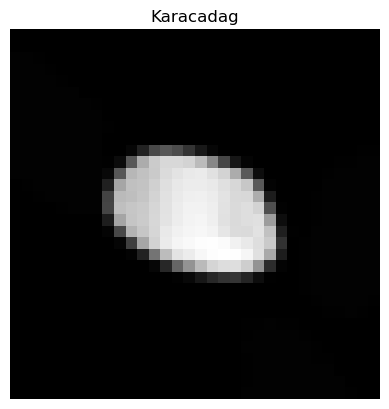

In [50]:
plt.imshow(test_samples[0].permute(1,2,0),cmap='gray')
plt.title(class_names[test_labels[0]])
plt.axis("off")
plt.show()

In [53]:
def make_predictions(model:torch.nn.Module,data:list,device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample=torch.unsqueeze(sample,dim=0).to(device)

      pred_logit=model(sample)

      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [54]:
#Make predictions
pred_probs=make_predictions(model=model,data=test_samples)
pred_probs[:2]

tensor([[4.0731e-02, 3.2886e-20, 7.2203e-09, 9.5468e-10, 9.5927e-01],
        [7.3197e-03, 1.9497e-19, 1.0568e-09, 4.9036e-10, 9.9268e-01]])

In [55]:
# Convert prediction probabilities to labels
pred_classes=torch.argmax(pred_probs,dim=1)
pred_classes

tensor([4, 4, 4, 2, 2, 3, 4, 2, 0])

In [56]:
test_labels

[4, 4, 4, 2, 2, 3, 4, 2, 0]

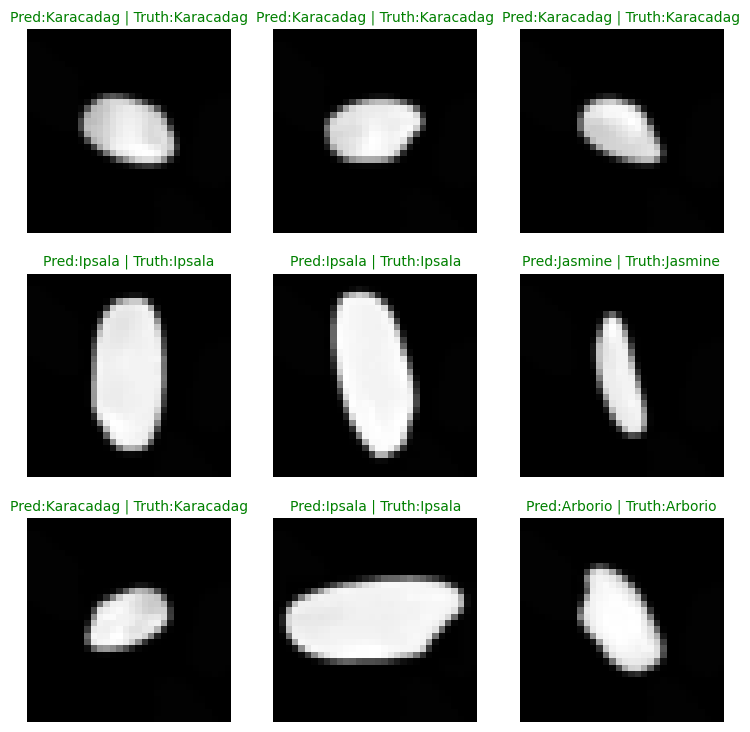

In [57]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):
  plt.subplot(nrows,ncols,i+1)

  plt.imshow(sample.permute(1,2,0),cmap='gray')

  pred_label=class_names[pred_classes[i]]

  truth_label=class_names[test_labels[i]]

  title_text=f"Pred:{pred_label} | Truth:{truth_label}"

  if pred_label==truth_label:
    plt.title(title_text,fontsize=10,color="green")
    
  else:
    plt.title(title_text,fontsize=10,color="red")

  plt.axis("off")

In [58]:
from tqdm.auto import tqdm

y_preds=[]
model.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making predictions .."):
    X,y=X.to(device),y.to(device)
    y_logits=model(X)
    y_pred=torch.softmax(y_logits.squeeze(),dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())


#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making predictions ..: 100%|██████████| 469/469 [00:19<00:00, 23.75it/s]


tensor([0, 0, 0,  ..., 0, 4, 4])

In [59]:
len(y_pred_tensor)

15000

In [60]:
import mlxtend
import torchmetrics

In [61]:
mlxtend.__version__
torchmetrics.__version__

'1.4.1'

In [62]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(task="Multiclass",num_classes=len(class_names))
y_true_tensor = torch.tensor(test_data.targets)
confmat_tensor=confmat(preds=y_pred_tensor,target=y_true_tensor)
confmat_tensor

tensor([[2919,    0,    0,   38,   43],
        [   0, 2955,    0,   45,    0],
        [  14,    0, 2972,   14,    0],
        [   1,  108,    4, 2886,    1],
        [ 311,    0,    0,    1, 2688]])

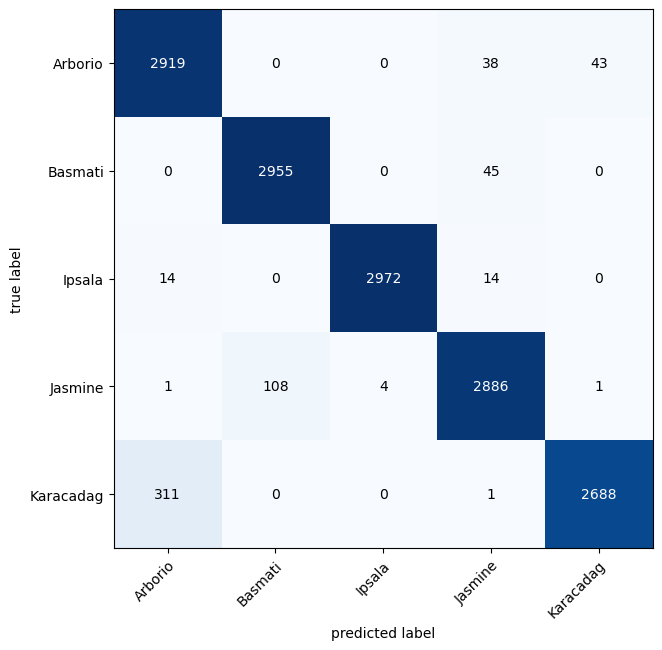

In [63]:
fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),class_names=class_names,figsize=(10,7))
plt.show()